In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import plotly.graph_objects as go
import plotly.express as px


In [27]:
file_path = 'smmh.csv'
data = pd.read_csv(file_path)

print(data.head())

print(data.info())

print(data.isnull().sum())

# Convertir columnas de escala (por ejemplo, "12. On a scale of 1 to 5, how easily distracted are you?") a valores numéricos
rating_columns = [col for col in data.columns if "scale of 1 to 5" in col]
data[rating_columns] = data[rating_columns].apply(pd.to_numeric, errors='coerce')

# Asegurarse de que los datos de texto (por ejemplo, plataformas) estén procesados
data['7. What social media platforms do you commonly use?'] = data['7. What social media platforms do you commonly use?'].str.split(', ')

            Timestamp  1. What is your age? 2. Gender 3. Relationship Status  \
0  4/18/2022 19:18:47                  21.0      Male      In a relationship   
1  4/18/2022 19:19:28                  21.0    Female                 Single   
2  4/18/2022 19:25:59                  21.0    Female                 Single   
3  4/18/2022 19:29:43                  21.0    Female                 Single   
4  4/18/2022 19:33:31                  21.0    Female                 Single   

  4. Occupation Status 5. What type of organizations are you affiliated with?  \
0   University Student                                         University       
1   University Student                                         University       
2   University Student                                         University       
3   University Student                                         University       
4   University Student                                         University       

  6. Do you use social media?  \

In [28]:
print(data.columns)

Index(['Timestamp', '1. What is your age?', '2. Gender',
       '3. Relationship Status', '4. Occupation Status',
       '5. What type of organizations are you affiliated with?',
       '6. Do you use social media?',
       '7. What social media platforms do you commonly use?',
       '8. What is the average time you spend on social media every day?',
       '9. How often do you find yourself using Social media without a specific purpose?',
       '10. How often do you get distracted by Social media when you are busy doing something?',
       '11. Do you feel restless if you haven't used Social media in a while?',
       '12. On a scale of 1 to 5, how easily distracted are you?',
       '13. On a scale of 1 to 5, how much are you bothered by worries?',
       '14. Do you find it difficult to concentrate on things?',
       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
       '16. Following the previous question, 

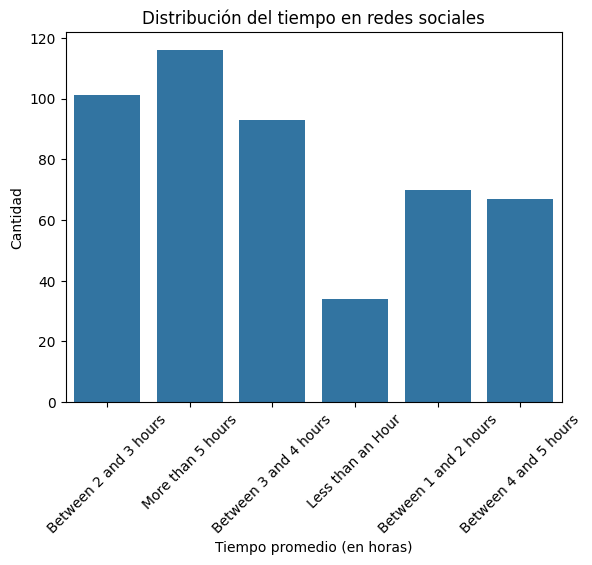

In [29]:
sns.countplot(data=data, x='8. What is the average time you spend on social media every day?')
plt.title("Distribución del tiempo en redes sociales")
plt.xlabel("Tiempo promedio (en horas)")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()

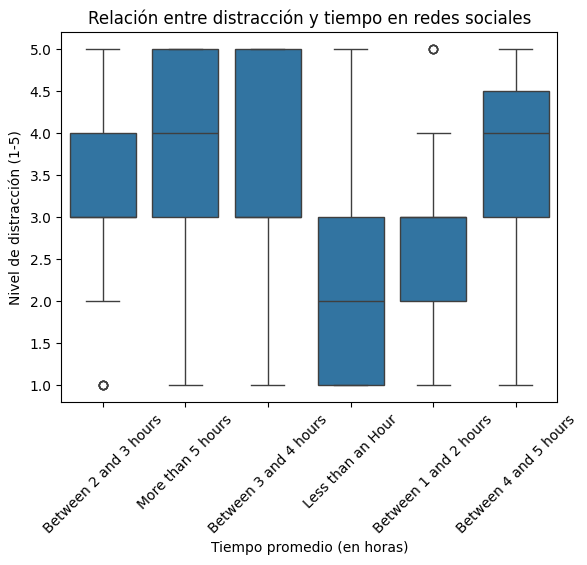

In [30]:
sns.boxplot(data=data, x='8. What is the average time you spend on social media every day?', y='12. On a scale of 1 to 5, how easily distracted are you?')
plt.title("Relación entre distracción y tiempo en redes sociales")
plt.xlabel("Tiempo promedio (en horas)")
plt.ylabel("Nivel de distracción (1-5)")
plt.xticks(rotation=45)
plt.show()

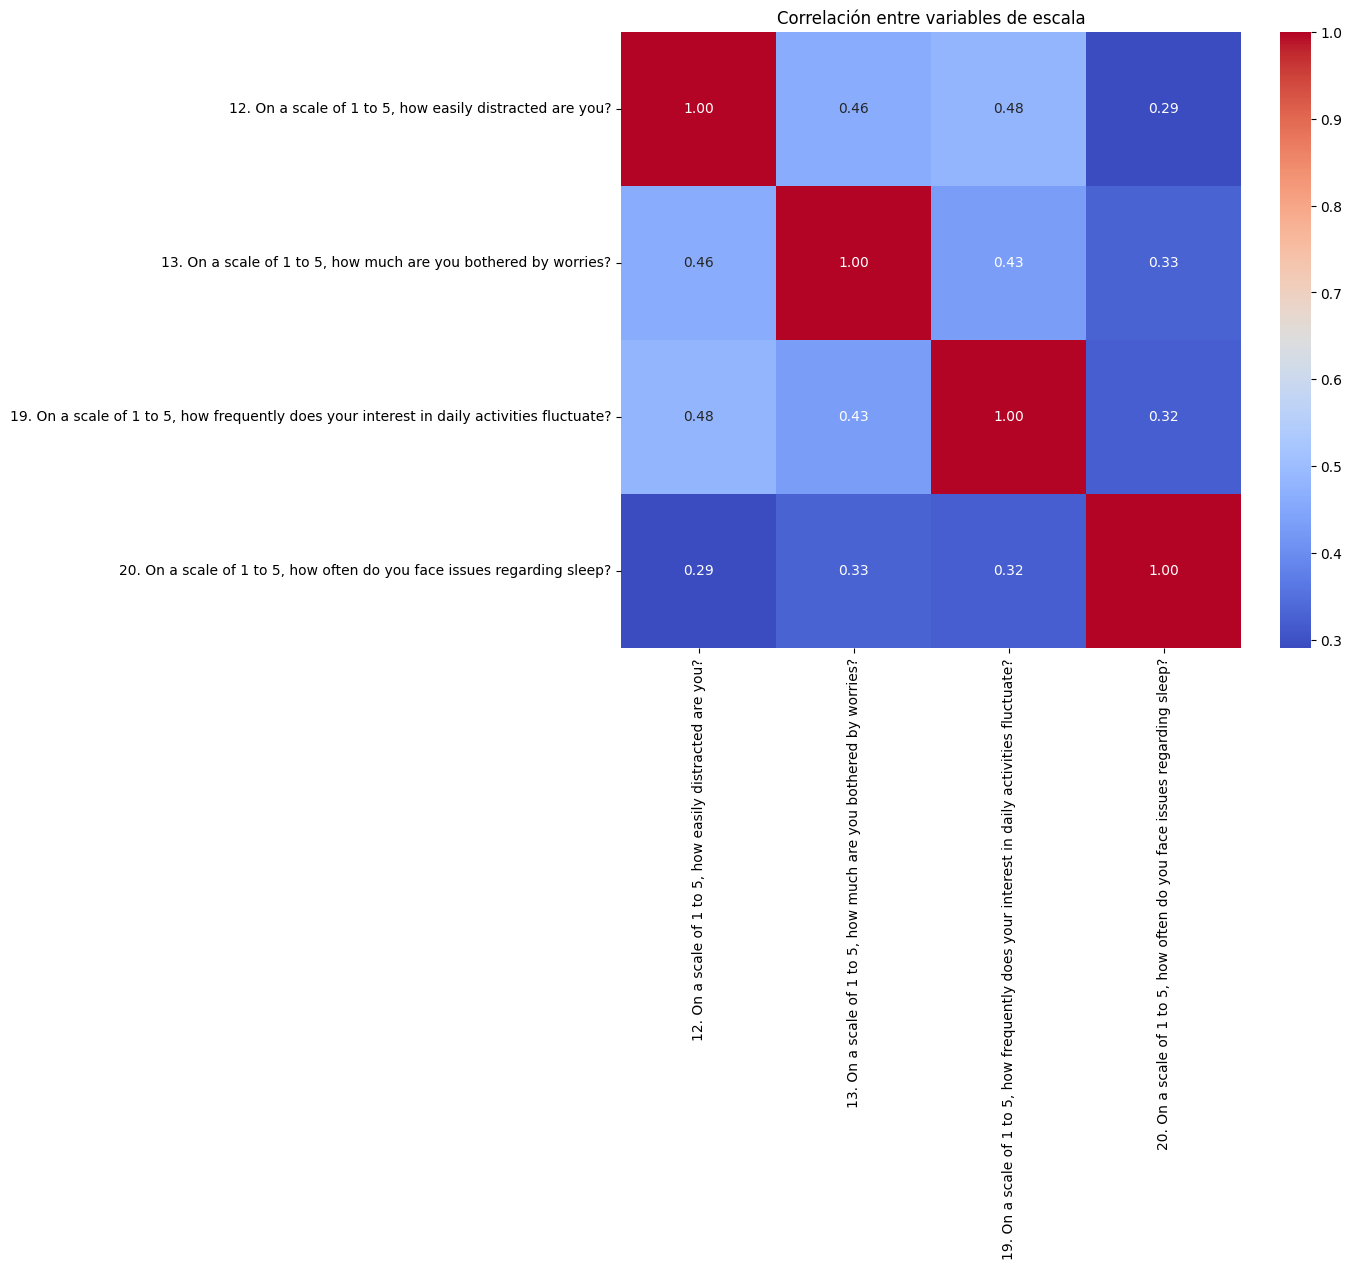

In [31]:
corr_matrix = data[rating_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre variables de escala")
plt.show()

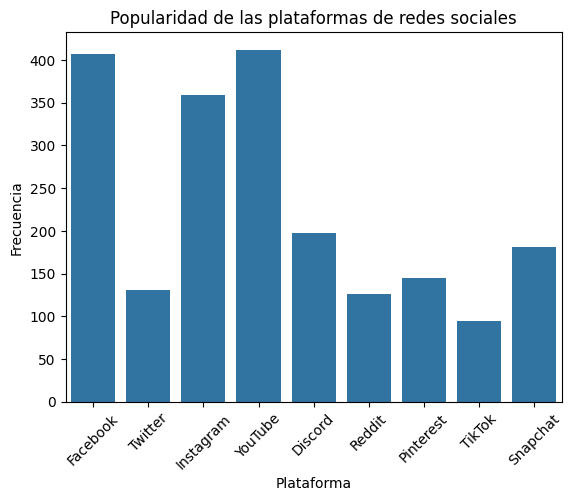

In [32]:
platforms = data['7. What social media platforms do you commonly use?'].explode()
platform_counts = Counter(platforms)

sns.barplot(x=list(platform_counts.keys()), y=list(platform_counts.values()))
plt.title("Popularidad de las plataformas de redes sociales")
plt.xlabel("Plataforma")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

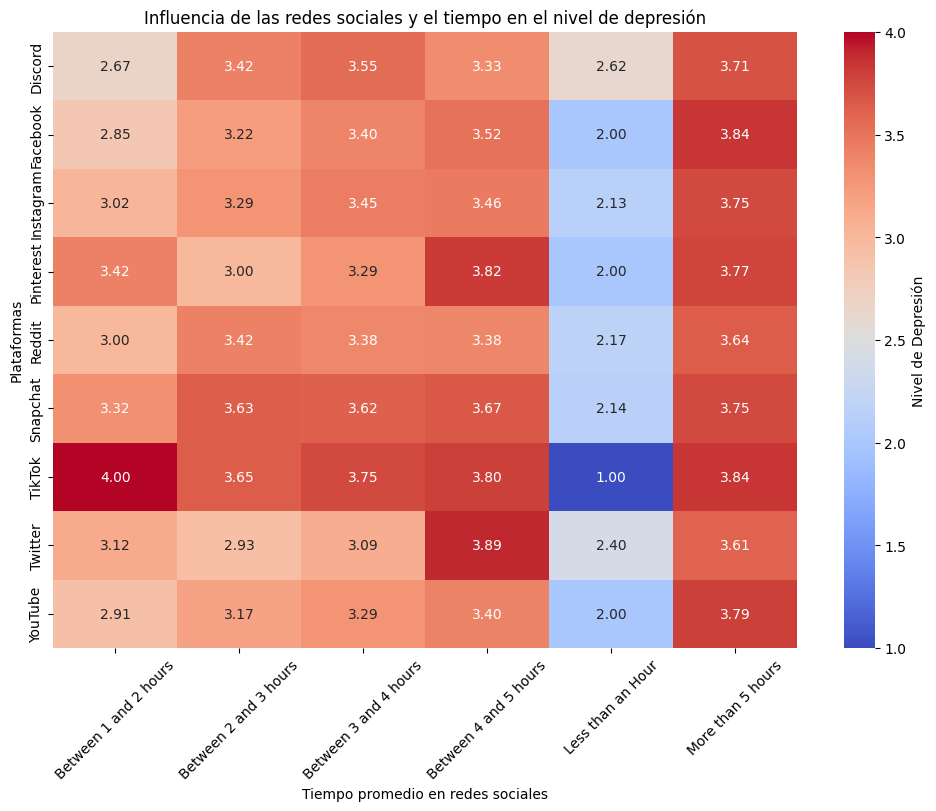

In [33]:
platform_columns = data['7. What social media platforms do you commonly use?'].explode().unique()
for platform in platform_columns:
    data[platform] = data['7. What social media platforms do you commonly use?'].apply(
        lambda x: platform in x if isinstance(x, list) else False
    )

depression_data = []
for platform in platform_columns:
    for time_category in data['8. What is the average time you spend on social media every day?'].unique():
        avg_depression = data[(data[platform]) & (data['8. What is the average time you spend on social media every day?'] == time_category)]['18. How often do you feel depressed or down?'].mean()
        depression_data.append({'Plataforma': platform, 'Tiempo': time_category, 'Nivel de Depresión': avg_depression})

depression_df = pd.DataFrame(depression_data)

depression_pivot = depression_df.pivot(index="Plataforma", columns="Tiempo", values="Nivel de Depresión")

plt.figure(figsize=(12, 8))
sns.heatmap(depression_pivot, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Nivel de Depresión'})
plt.title("Influencia de las redes sociales y el tiempo en el nivel de depresión")
plt.xlabel("Tiempo promedio en redes sociales")
plt.ylabel("Plataformas")
plt.xticks(rotation=45)
plt.show()


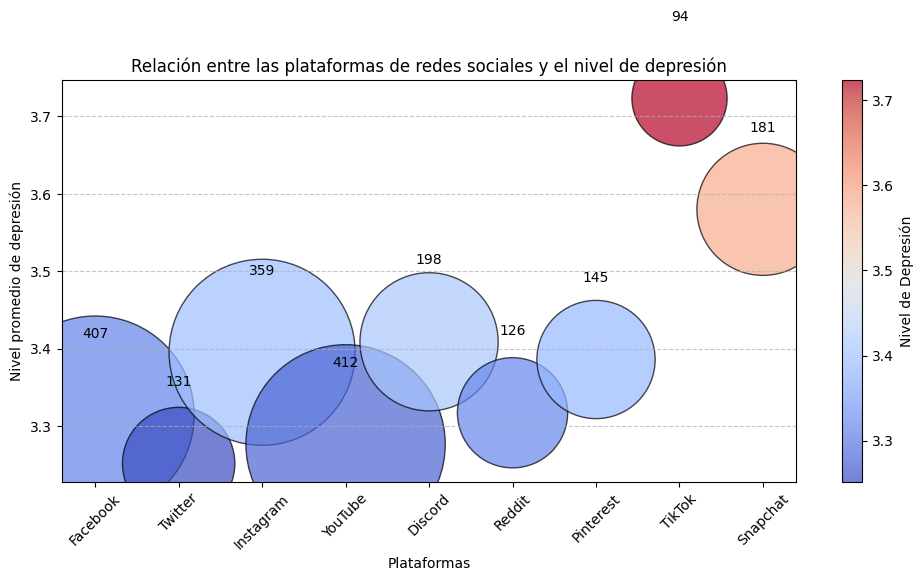

In [34]:
platform_data = []
for platform in platform_columns:
    user_count = data[platform].sum()
    avg_depression = data[data[platform]]['18. How often do you feel depressed or down?'].mean()
    platform_data.append({'Plataforma': platform, 'Usuarios': user_count, 'Nivel de Depresión': avg_depression})

platform_df = pd.DataFrame(platform_data)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=platform_df['Plataforma'],
    y=platform_df['Nivel de Depresión'],
    s=platform_df['Usuarios'] * 50,
    alpha=0.7,
    c=platform_df['Nivel de Depresión'],
    cmap='coolwarm',
    edgecolors='black'
)

for i, row in platform_df.iterrows():
    plt.text(row['Plataforma'], row['Nivel de Depresión'] + 0.1, str(row['Usuarios']), ha='center')

plt.colorbar(scatter, label='Nivel de Depresión')
plt.title("Relación entre las plataformas de redes sociales y el nivel de depresión")
plt.xlabel("Plataformas")
plt.ylabel("Nivel promedio de depresión")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


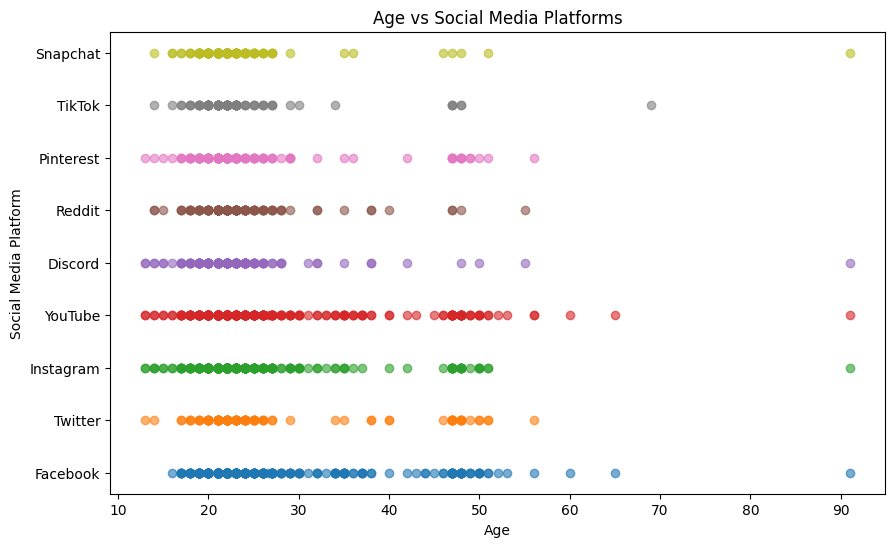

In [35]:
data = pd.read_csv('smmh.csv')

data['1. What is your age?'] = pd.to_numeric(data['1. What is your age?'], errors='coerce')

social_media_platforms = data['7. What social media platforms do you commonly use?'].str.split(',').explode().str.strip()

age_social_media = pd.DataFrame({
    'Age': data.loc[social_media_platforms.index, '1. What is your age?'].values,
    'Social Media': social_media_platforms.values
})

plt.figure(figsize=(10, 6))
for platform in age_social_media['Social Media'].unique():
    platform_data = age_social_media[age_social_media['Social Media'] == platform]
    plt.scatter(platform_data['Age'], [platform] * len(platform_data), label=platform, alpha=0.6)

plt.title("Age vs Social Media Platforms")
plt.xlabel("Age")
plt.ylabel("Social Media Platform")
plt.show()


In [36]:
average_age_by_platform = age_social_media.groupby('Social Media')['Age'].mean().reset_index()

average_age_by_platform.columns = ['Social Media Platform', 'Average Age']

print(average_age_by_platform)

  Social Media Platform  Average Age
0               Discord    22.808081
1              Facebook    26.149140
2             Instagram    24.367688
3             Pinterest    24.565517
4                Reddit    23.555556
5              Snapchat    22.762431
6                TikTok    23.670213
7               Twitter    26.885496
8               YouTube    25.865777


In [37]:
data["2. Gender"] = data["2. Gender"].str.strip()

data["2. Gender"] = data["2. Gender"].replace({
    "NB": "Non-binary",
    "Non binary": "Non-binary",
    "Non-binary": "Non-binary",
    "Nonbinary": "Non-binary",
    "unsure": "Unsure",
    "There are others???": None
})

data = data.dropna(subset=["2. Gender"])

columns = [
    "12. On a scale of 1 to 5, how easily distracted are you?",
    "13. On a scale of 1 to 5, how much are you bothered by worries?",
    "15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?",
    "19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?",
    "20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
]

grouped = data.groupby("2. Gender")[columns].mean()

angles = np.linspace(0, 2 * np.pi, len(columns), endpoint=False).tolist()

fig = go.Figure()

for gender in grouped.index:
    values = grouped.loc[gender].tolist()
    values.append(values[0])
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=columns + [columns[0]],
        fill='toself',
        name=gender,
        hoverinfo="name+text+r",
        text=columns
    ))

fig.update_layout(
    title="Cuadro de valores de radar",
    title_font=dict(size=24),
    title_x=0.5,
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 5]
        ),
        angularaxis=dict(
            showticklabels=False
        )
    ),
    showlegend=True,
    legend_title="Gender",
    hovermode="closest",
    template="plotly",
    width=700,
    height=700
)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
data["Month"] = data["Timestamp"].dt.to_period("M").astype(str)

emotion_columns = [
    "12. On a scale of 1 to 5, how easily distracted are you?",
    "13. On a scale of 1 to 5, how much are you bothered by worries?",
    "18. How often do you feel depressed or down?",
    "19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?",
    "20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
]

monthly_emotion = data.groupby("Month")[emotion_columns].mean().reset_index()

monthly_emotion["Average"] = monthly_emotion[emotion_columns].mean(axis=1)

problem_month = monthly_emotion.loc[monthly_emotion["Average"].idxmax(), "Month"]

fig = px.line(
    monthly_emotion.melt(id_vars=["Month"], value_vars=emotion_columns),
    x="Month", y="value", color="variable",
    title="Perfil emocional a lo largo del tiempo",
    labels={
        "value": "Ansiedad/depresión/media",
        "Month": "Mes",
        "variable": "Aspecto emocional"
    },
    template="plotly_white"
)

fig.update_layout(
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.4,
        xanchor='center',
        x=0.5,
        tracegroupgap=10
    ),
    shapes=[
        dict(
            type="line",
            x0=problem_month, x1=problem_month,
            y0=0, y1=1,
            xref="x", yref="paper",
            line=dict(color="red", width=2, dash="dash")
        )
    ]
)

fig.show()